In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
particlesDict = {}

In [3]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [4]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [5]:
#This function calculates the invariant mass of a particle using the final particles
def invariant_mass(file_name):
    invariant_mass = []
    for e in pylheV.readLHE(file_name):
        energy = 0
        px = 0
        py = 0
        pz = 0
        for ptc in e.particles:
            if ptc.status > 0:
                #Summing all components of final e+ and e-
                energy = energy + ptc.e
                px = px + ptc.px
                py = py + ptc.py
                pz = pz + ptc.pz
        
        #Calculating the invariant mass
        inv_mass = np.sqrt(energy**2 - px**2 - py**2 - pz**2)
                
                    

        invariant_mass.append(inv_mass)

                
    return invariant_mass
   

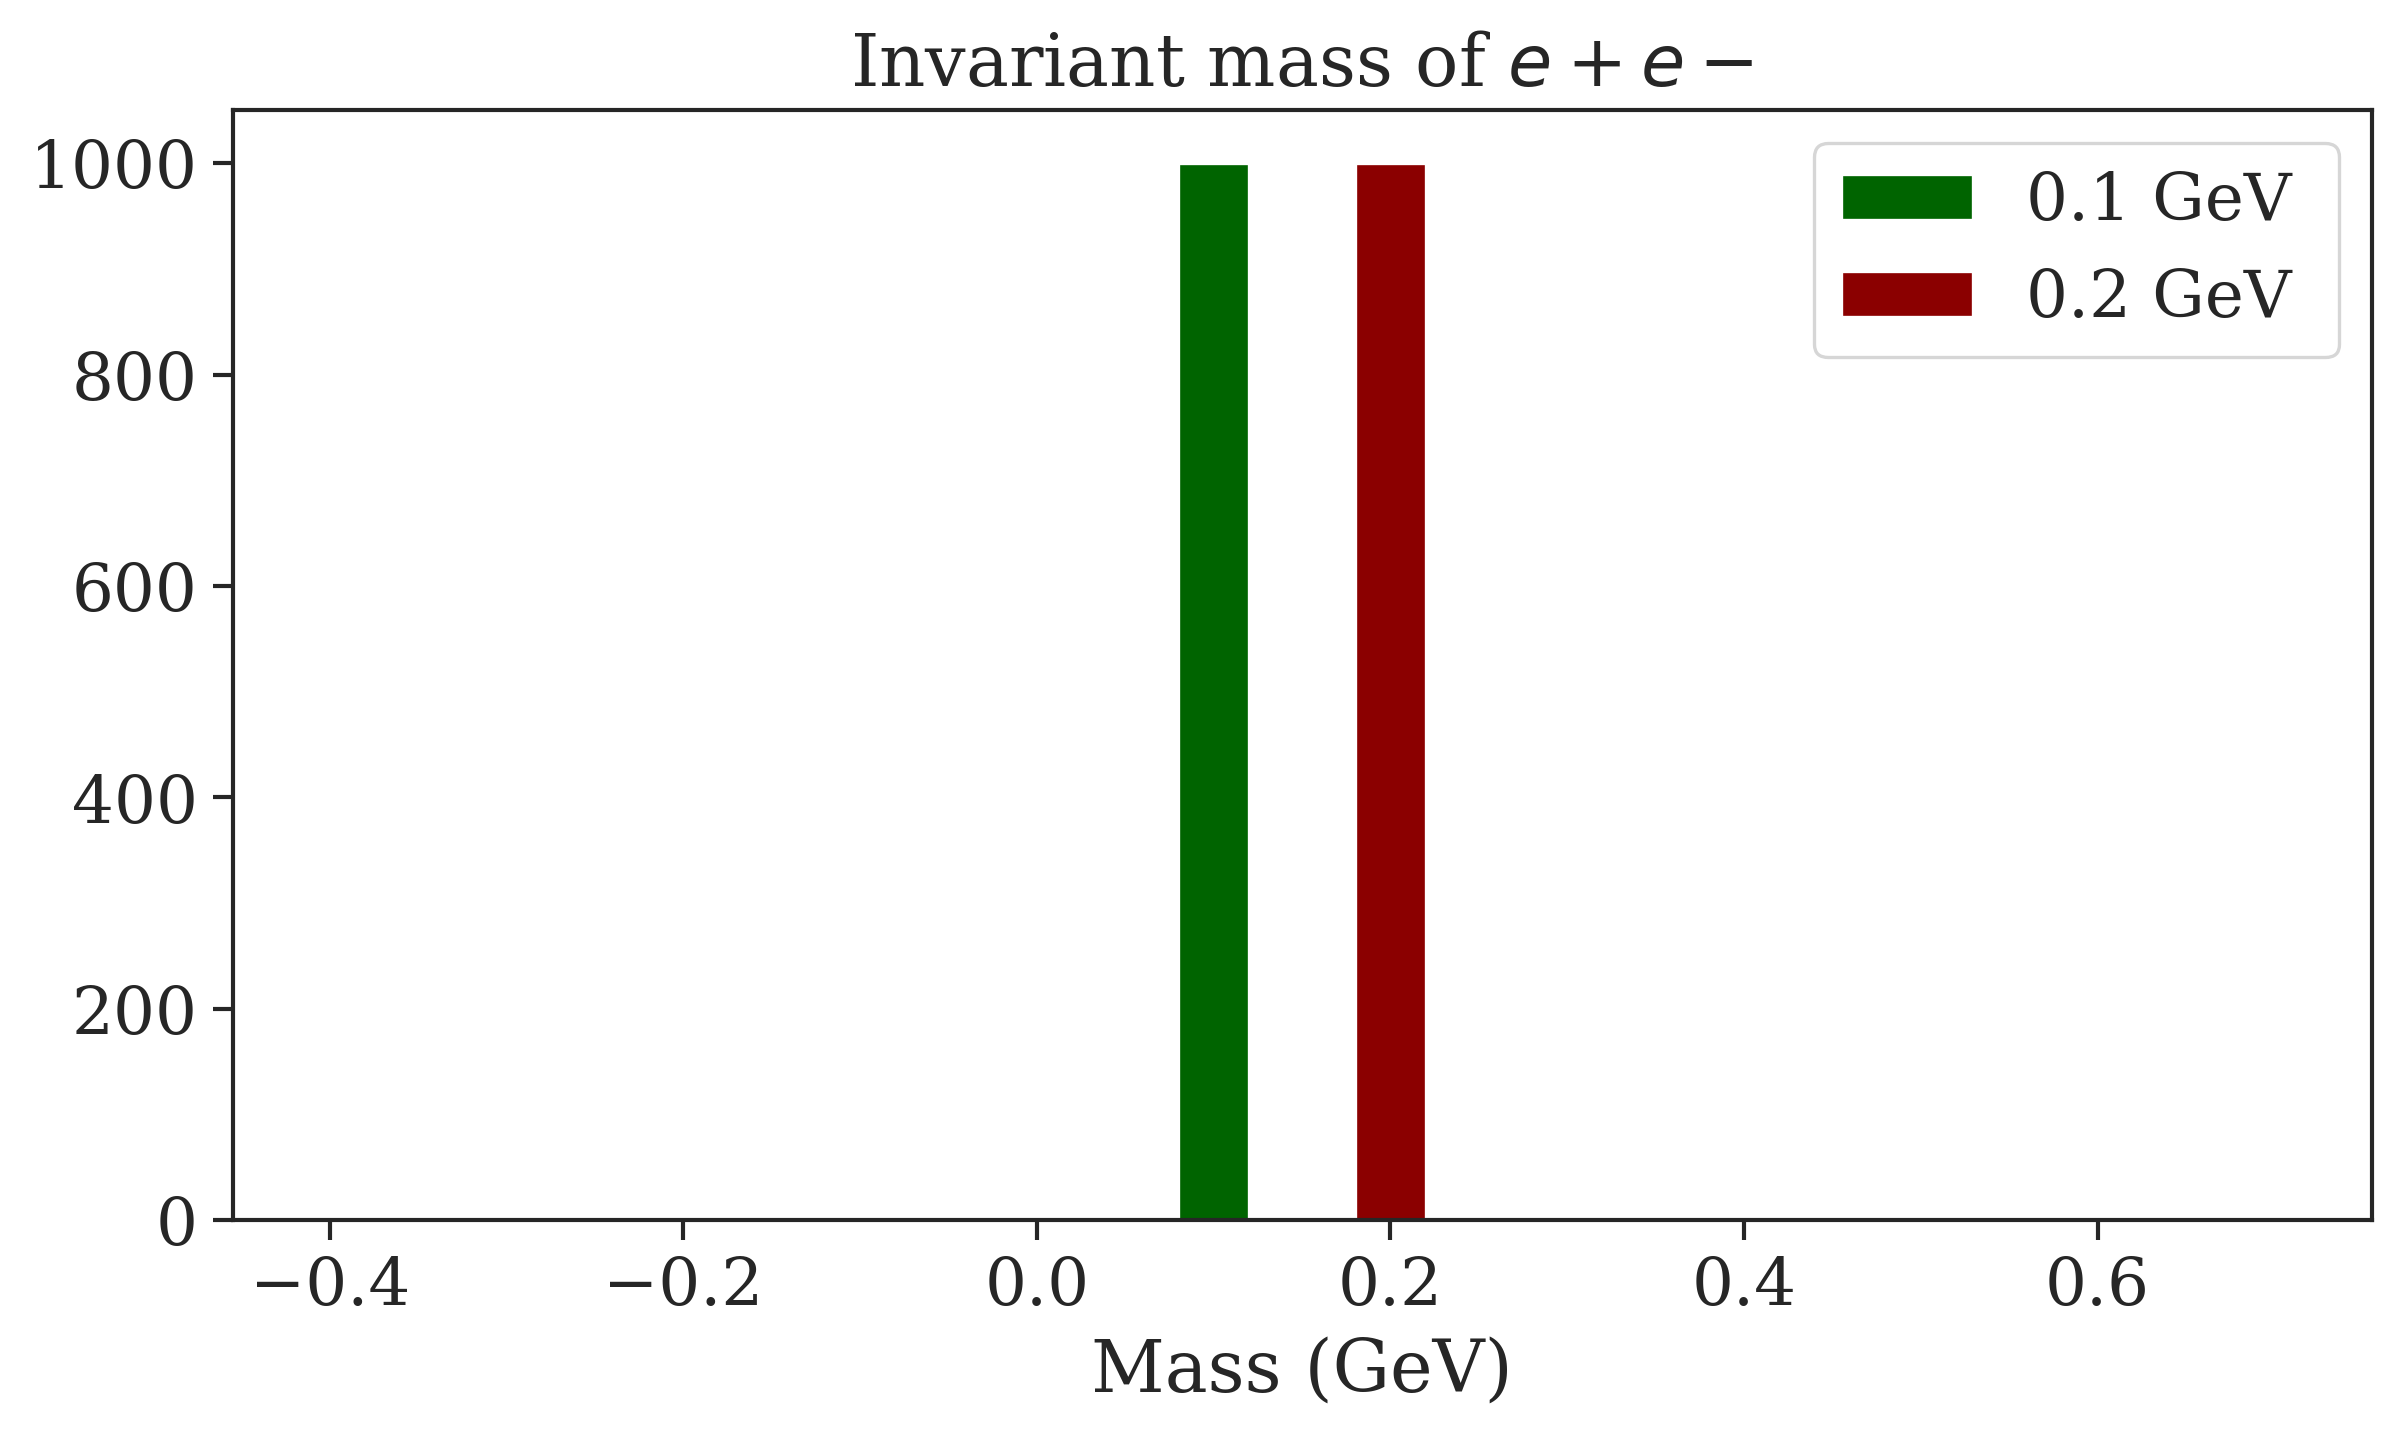

In [6]:
#Invariant mass plot
inv_mass_dot1GeV = invariant_mass('e+e-_dot1GeV_out.lhe')
inv_mass_dot2GeV = invariant_mass('e+e-_dot2GeV_out.lhe')
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
histogram = plt.hist(inv_mass_dot1GeV, bins = 25,  color = 'darkgreen',label =r'0.1 GeV ')
histogram1 = plt.hist(inv_mass_dot2GeV, bins = 25, color = 'darkred',label =r'0.2 GeV')


plt.xlabel(r'Mass (GeV)')
plt.title(r'Invariant mass of $e+e-$')
plt.legend()
plt.show()

In [29]:
#Cross section and E_cm values

cross_section = [3.922e+09,3.558e+09,
3.242e+09, 2.966e+09,
2.724e+09, 2.51e+09 ,2.321e+09, 2.152e+09,2.001e+09,
1.865e+09,1.743e+09,  1.633e+09,
1.532e+09, 
1.441e+09,
1.357e+09,  
1.281e+09,1.211e+09,  1.146e+09,
1.086e+09, 1.031e+09,
9.806e+08]
e_cm = []
for i in range(21):
    e_cm.append(0.1+i*0.005)
    

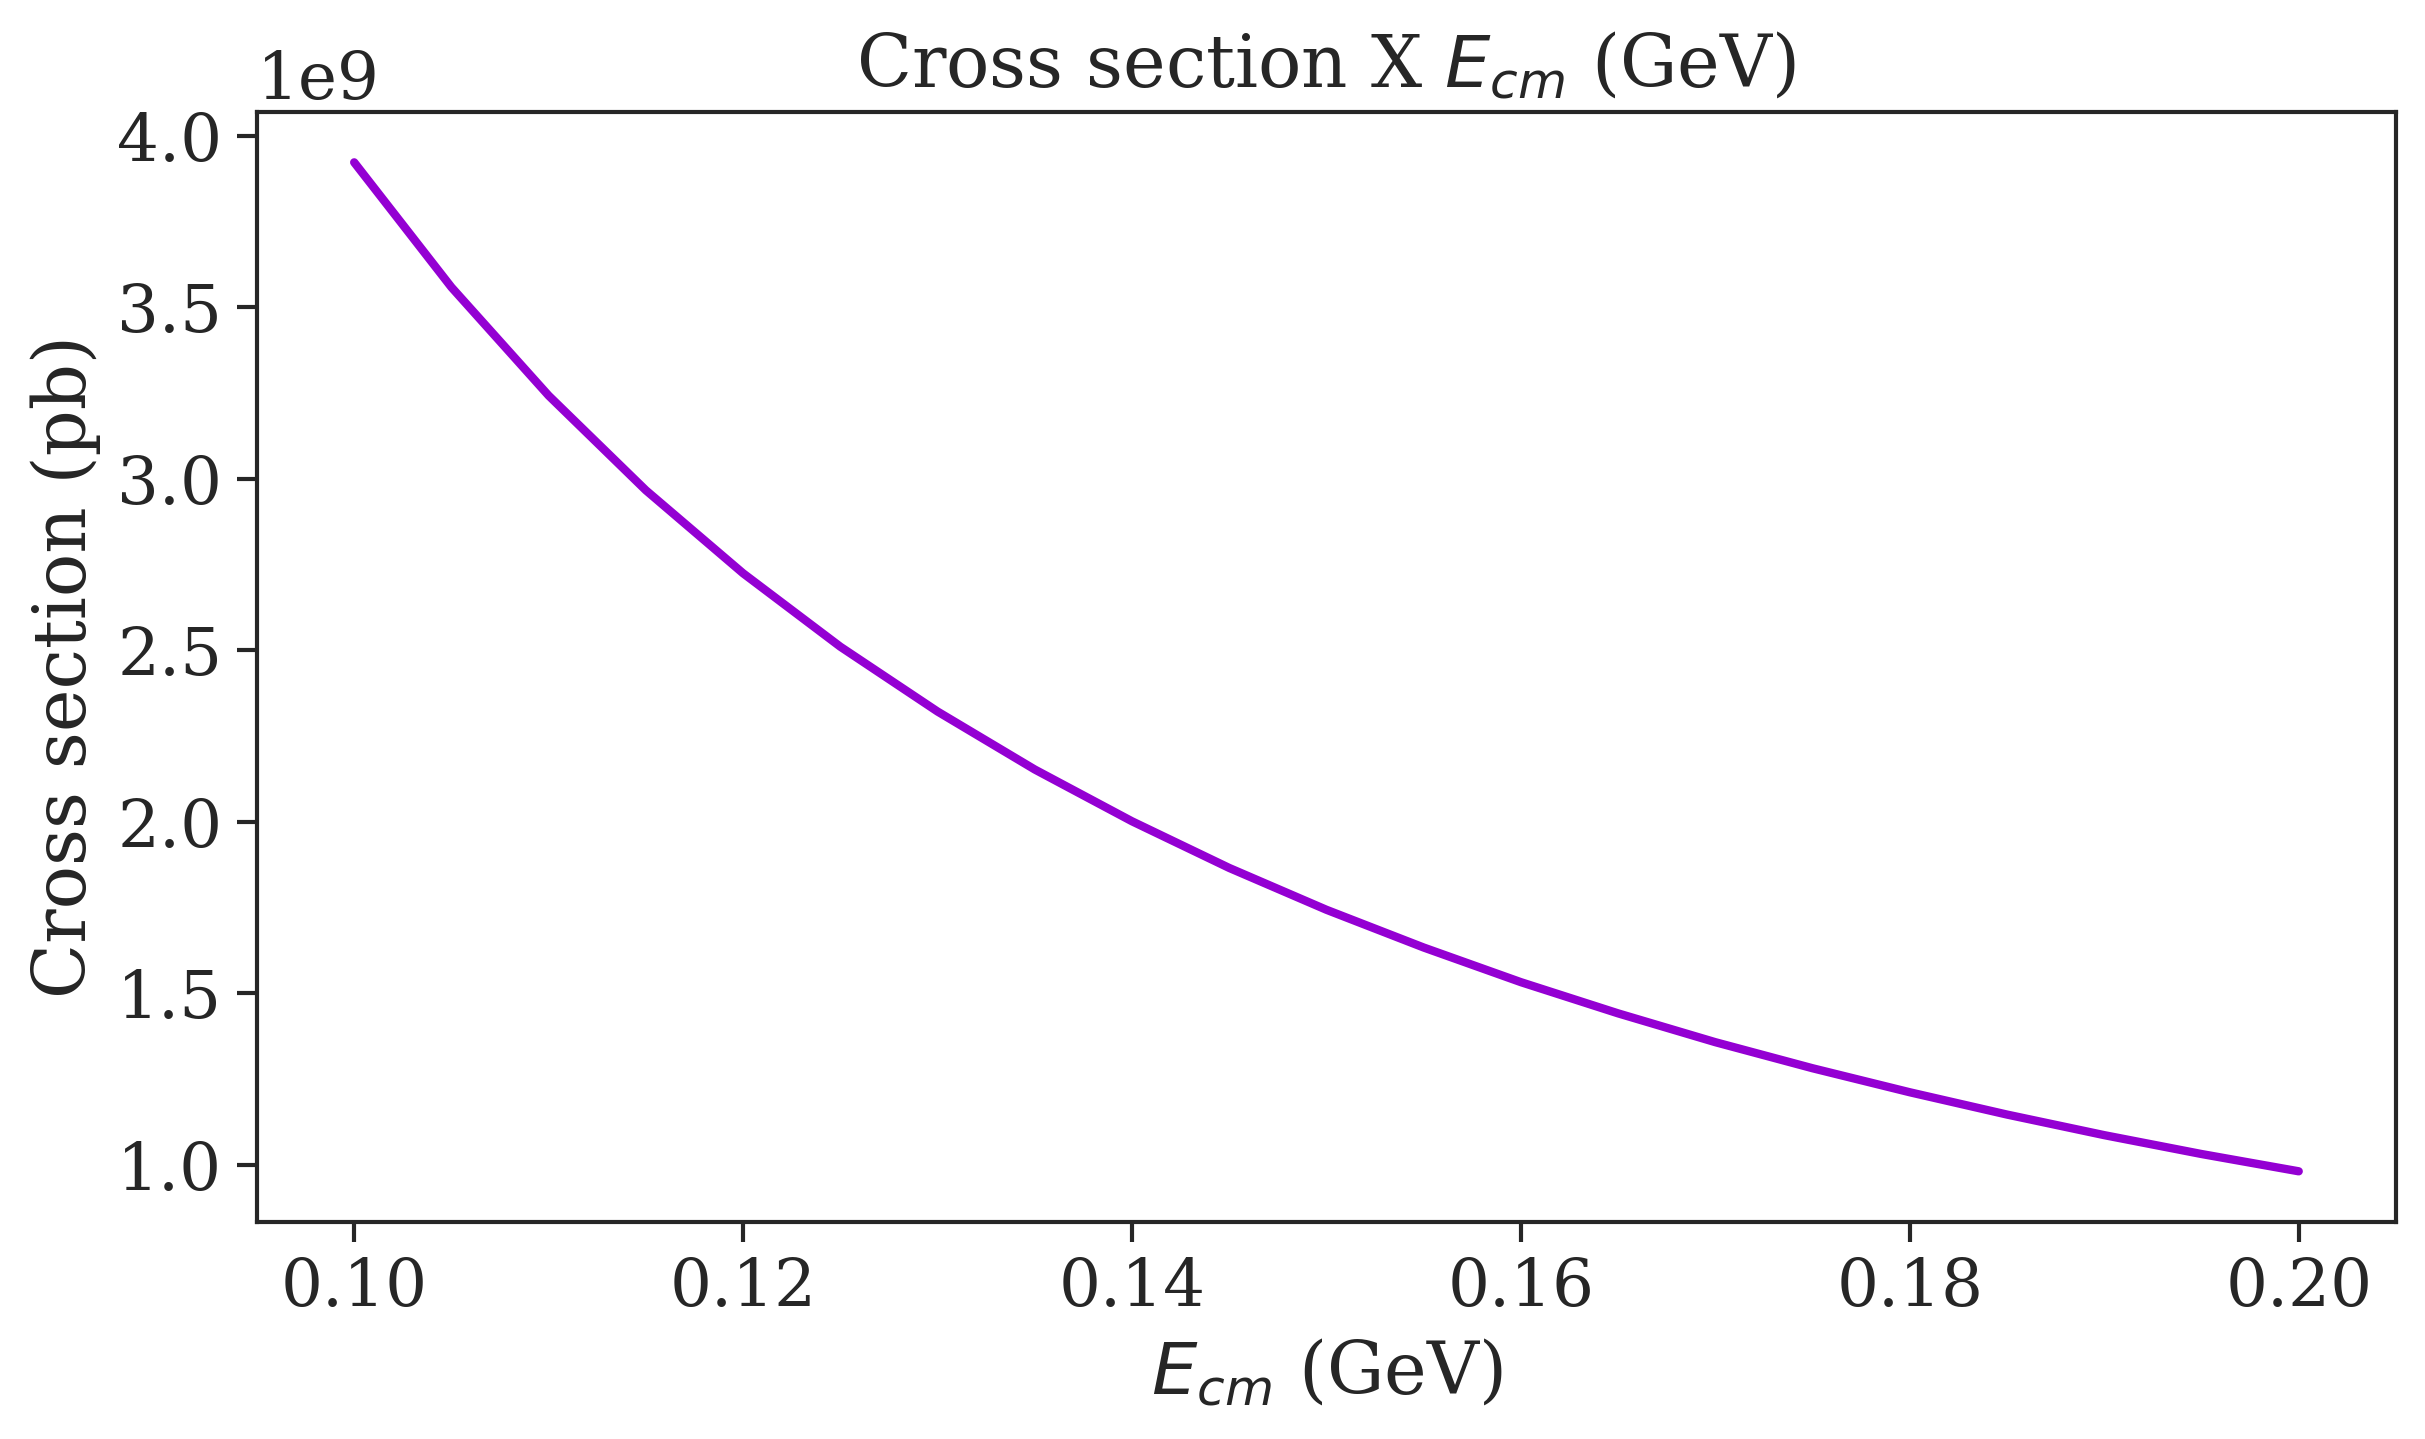

In [43]:
#Cross section X E_cm plot
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.plot(e_cm,cross_section, linewidth = 2, color = 'darkviolet')

plt.ylabel(r'Cross section (pb)')
plt.xlabel(r'$E_{cm}$ (GeV)')
plt.title(r'Cross section X $E_{cm}$ (GeV)')

plt.show()